# Milestone 2 
# How much emission are you REALLY responsible for.

In this notebook we focus on exploring the dataset we have selected, and prepare the data for the sory telling in milestone 3.

This notebook will be devided into the same section as our datasory.

## Introduction
we will presented the data from the world point of view including
   - Percentage of the emission due to agriculture in total emission
   - The part of emission in agriculture due to the meat production and all other animal product and the part of emission due to the vegetable source of food
   - The same as the previous point but by country.
    
In the introduction we will show the evolution of these data from 1961 to 2017.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants
DATA_PATH = '../data/'
GENERATED_DATA_PATH = '../generated/'

### Percentage of the emission due to agriculture in total emission

Use the Environment_Emissions_by_Sector_E_All_Data_(Normalized) for the world only to show the evolution of the percentage of agriculture emission

### Part of emission for meat/vegetable
Now we will show the evolution of the part of emission due to animal product and the part due to the production of vegetables.

In [142]:
emission_total_path = DATA_PATH+'Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv'
emissions_total = pd.read_csv(emission_total_path, encoding='latin-1', engine='python')

In [143]:
print(emissions_total.shape)
emissions_total.head()

(517655, 12)


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),1961,1961,gigagrams,240.6831,A,NaN
1,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),1962,1962,gigagrams,245.3106,A,NaN
2,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),1963,1963,gigagrams,255.8285,A,NaN
3,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),1964,1964,gigagrams,259.0650,A,NaN
4,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),1965,1965,gigagrams,265.5980,A,NaN


In [55]:
# check for NaN values
emissions_total.columns[emissions_total.isna().any()]

Index([], dtype='object')

In [56]:
# What kind of emissions are there?
print("We have the following kind of emissions:",emissions_total['Element'].unique())
#print(emissions_total['Element Code'].unique())

# Units are all in Gigagrams
# print(emissions_total['Unit'].unique())

#emissions_total['Country'].unique()

We have the following kind of emissions: ['Emissions (CO2eq)' 'Emissions (CO2eq) from CH4'
 'Emissions (CO2eq) from N2O']


CO2eq means 'Carbon dioxide equivalent'
https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Carbon_dioxide_equivalent

In [58]:
emissions_total.Item.unique()

array(['Enteric Fermentation', 'Manure Management', 'Rice Cultivation',
       'Synthetic Fertilizers', 'Manure applied to Soils',
       'Manure left on Pasture', 'Crop Residues',
       'Cultivation of Organic Soils', 'Burning - Crop residues',
       'Burning - Savanna', 'Agriculture total', 'Agricultural Soils'],
      dtype=object)

In [130]:
vegetal_emissions = ['Rice Cultivation', 'Synthetic Fertilizers', 'Manure applied to Soils', 'Crop Residues',
       'Cultivation of Organic Soils', 'Burning - Crop residues']
animal_emissions = ['Enteric Fermentation', 'Manure Management', 'Manure left on Pasture']

In [7]:
# CO2eq is the total (CH4+N20) expressed as Carbon dioxide equivalent

element_code = {'CO2eq': 7231, 'N2O': 7243, 'CH4': 7244}
columns = ['Item', 'Value']

In [131]:
emissions_world = emissions_total[(emissions_total['Area'] == 'World')]

In [9]:
%%capture

emissions_world_CO2eq = emissions_world[emissions_world['Element Code'] == element_code['CO2eq']]
emissions_world_CO2eq = emissions_world_CO2eq[columns].groupby(['Item']).sum().reset_index().set_index('Item')

emissions_world_N2O = emissions_world[emissions_world['Element Code'] == element_code['N2O']]
emissions_world_N2O = emissions_world_N2O[columns].groupby(['Item']).sum().reset_index().set_index('Item')

emissions_world_CH4 = emissions_world[emissions_world['Element Code'] == element_code['CH4']]
emissions_world_CH4 = emissions_world_CH4[columns].groupby(['Item']).sum().reset_index().set_index('Item')

In [10]:
# Drop stats that are sum of the others
emissions_world_CO2eq.drop(['Agricultural Soils', 'Agriculture total'], inplace=True)
emissions_world_CO2eq.sort_values('Value', ascending=False, inplace=True)
print(emissions_world_CO2eq.head())

emissions_world_N2O.drop(['Agricultural Soils', 'Agriculture total'], inplace=True)
emissions_world_N2O.sort_values('Value', ascending=False, inplace=True)

emissions_world_CH4.drop('Agriculture total', inplace=True)
emissions_world_CH4.sort_values('Value', ascending=False, inplace=True)

                               Value
Item                                
Enteric Fermentation    1.007673e+08
Manure left on Pasture  3.681827e+07
Rice Cultivation        2.576103e+07
Synthetic Fertilizers   2.375089e+07
Manure Management       1.777713e+07


In [11]:
# Left join
emissions_plot = emissions_world_CO2eq.join(emissions_world_N2O, lsuffix="CO2eq", rsuffix="N20").join(emissions_world_CH4)\
                    .rename({'Value':'ValueCH4'}, axis=1).reset_index().fillna(0)
emissions_plot.head()

,Item,ValueCO2eq,ValueN20,ValueCH4
0,Enteric Fermentation,1.007673e+08,0.000000e+00,1.007673e+08
1,Manure left on Pasture,3.681827e+07,3.681827e+07,0.000000e+00
2,Rice Cultivation,2.576103e+07,0.000000e+00,2.576103e+07
3,Synthetic Fertilizers,2.375089e+07,2.375089e+07,0.000000e+00
4,Manure Management,1.777713e+07,7.436514e+06,1.034062e+07


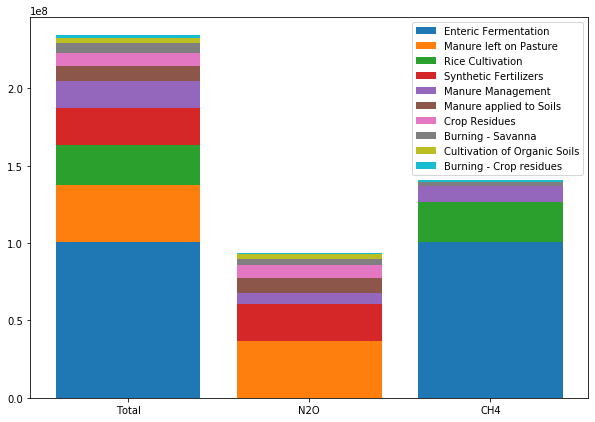

In [12]:
from matplotlib.rcsetup import cycler

fig, ax = plt.subplots(figsize=(10,7))  

items = emissions_plot['Item']
margin_bottom = np.zeros(emissions_plot.shape[1]-1)

ind = ["Total", "N2O", "CH4"]

colors = plt.cm.tab10(np.linspace(0, 1, len(emissions_plot['Item'])))

for num, item in enumerate(items):
    values = list(emissions_plot.loc[num])[1:4]
    plt.bar(ind, values, bottom=margin_bottom, color = colors[num],label=item)
    margin_bottom += values
plt.legend()
plt.show()

#should add the emissions from energy use

### Emission By countries

In [144]:
# Filter only Emissions (CO2eq)
emissions_total = emissions_total[emissions_total.Element == 'Emissions (CO2eq)']
# We can get rid of all codes + Unit + Element
emissions_total = emissions_total.drop(columns=['Area Code', 'Item Code', 'Element Code', 'Year Code', 'Unit', 'Element'])

In [145]:
# Filter only Emmisions (CO2eq)
print(emissions_total.shape)
emissions_total.head()

(144391, 6)


,Area,Item,Year,Value,Flag,Note
59,Afghanistan,Enteric Fermentation,1961,5054.3459,A,NaN
60,Afghanistan,Enteric Fermentation,1962,5151.5228,A,NaN
61,Afghanistan,Enteric Fermentation,1963,5372.3989,A,NaN
62,Afghanistan,Enteric Fermentation,1964,5440.3650,A,NaN
63,Afghanistan,Enteric Fermentation,1965,5577.5580,A,NaN


In [146]:
# Flags
emissions_total.Flag.value_counts()

A     127183
Fc      9807
EA      7401
Name: Flag, dtype: int64

The flags represent : 
* `A` : Aggregate, may include official, semi-official, estimated or calculated data
* `Fc` : Calculated data
* `EA` : Emissions computed using data from Fertilizer Archive dataset

All these flag are acceptable we can then drop this column

In [147]:
emissions_total = emissions_total.drop(columns='Flag')

In [148]:
# Remove aggregation item
agg_item = ['Agriculture total', 'Agricultural Soils']
emissions_total = emissions_total.drop(emissions_total[emissions_total['Item'].isin(agg_item)].index)

# Remove aggregation countries
agg_country = ['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia & New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD']
emissions_total = emissions_total.drop(emissions_total[emissions_total['Area'].isin(agg_country)].index)
emissions_total = emissions_total.rename(columns={'Area':'Country'})

In [149]:
# Pivot the table to make element columns
emissions_total = pd.pivot_table(emissions_total, values='Value', index=['Country', 'Year'], columns='Item')
emissions_total.head()

Item              Burning - Crop residues  Burning - Savanna  Crop Residues  \
Country     Year                                                              
Afghanistan 1961                 118.2797                NaN       332.7512   
            1962                 121.7607                NaN       335.2904   
            1963                 121.7607                NaN       312.7451   
            1964                 122.7093                NaN       337.2814   
            1965                 122.3902                NaN       340.9305   

Item              Cultivation of Organic Soils  Enteric Fermentation  \
Country     Year                                                       
Afghanistan 1961                           NaN             5054.3459   
            1962                           NaN             5151.5228   
            1963                           NaN             5372.3989   
            1964                           NaN             5440.3650   
            1965                           NaN             5577.5580   

Item              Manure Management  Manure applied to Soils  \
Country     Year                                               
Afghanistan 1961           367.8310                 390.4421   
            1962           376.4362                 396.0043   
            1963           392.5811                 406.7487   
            1964           399.8526                 415.1598   
            1965           413.3914                 427.7566   

Item              Manure left on Pasture  Rice Cultivation  \
Country     Year                                             
Afghanistan 1961               2368.1734             617.4   
            1962               2326.1498             617.4   
            1963               2390.2709             617.4   
            1964               2422.8848             646.8   
            1965               2482.0286             646.8   

Item              Synthetic Fertilizers  
Country     Year                         
Afghanistan 1961                 6.4546  
            1962                 6.4546  
            1963                 6.4546  
            1964                 6.4546  
            1965                 6.4546

In [150]:
# Here we assume that if there is no data the country just do not produce any emission of that type
emissions_total.fillna(0, inplace=True)

We will now divide the emissions between animal and vegetal emissions

In [151]:
emissions_total['Animal'] = emissions_total[animal_emissions].sum(axis=1)
emissions_total['Vegetal'] = emissions_total[vegetal_emissions].sum(axis=1)
emissions_total = emissions_total[['Animal', 'Vegetal']]
emissions_total.head()

Item                 Animal    Vegetal
Country     Year                      
Afghanistan 1961  7790.3503  1465.3276
            1962  7854.1088  1476.9100
            1963  8155.2509  1465.1091
            1964  8263.1024  1528.4051
            1965  8472.9780  1544.3319

In [152]:
# Create a new column sum
emissions_total['Sum'] = emissions_total.sum(axis=1)
emissions_total.head()

Item                 Animal    Vegetal         Sum
Country     Year                                  
Afghanistan 1961  7790.3503  1465.3276   9255.6779
            1962  7854.1088  1476.9100   9331.0188
            1963  8155.2509  1465.1091   9620.3600
            1964  8263.1024  1528.4051   9791.5075
            1965  8472.9780  1544.3319  10017.3099

In [153]:
# create a new dataframe with relative numbers
relative_emissions_total = pd.DataFrame()
for col in emissions_total.columns:
    new_col = '% '+col
    relative_emissions_total[new_col] = emissions_total[col]/emissions_total['Sum'] * 100
    
relative_emissions_total.head()

% Animal  % Vegetal  % Sum
Country     Year                             
Afghanistan 1961  84.168338  15.831662  100.0
            1962  84.172039  15.827961  100.0
            1963  84.770746  15.229254  100.0
            1964  84.390503  15.609497  100.0
            1965  84.583367  15.416633  100.0

In [154]:
# Save the datasets
emissions_total.to_csv(GENERATED_DATA_PATH+'emissions_total.csv')
relative_emissions_total.to_csv(GENERATED_DATA_PATH+'relative_emissions_total.csv')

## Belgium vs Switzerland
Then our main analysis will focus on comparing emission from Belgium and Switzerland for vegetable products and meat products.

The data presented in the introduction do not take into account the importation/exportation of the country.
We will use the `detailed trade matrix` data set to adapt these emission by adding emmission due to the production of imported procuct and removing emission for exportation product.

We will then compare these new data between belgium and Switzerland to figure out which country is responsible for the most emission.

First because the trade data set is huge we will only select rows concerning Belgium and then export the dataset to pandas to create a new csv file containing the rows we want.

In [8]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '12g'),  # find
                                   ('spark.driver.memory','4g'), # your
                                   ('spark.driver.maxResultSize', '2G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

In [9]:
trades = spark.read.csv(DATA_PATH+'Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv', header =True)

In [10]:
trades.printSchema()

root
 |-- Reporter Country Code: string (nullable = true)
 |-- Reporter Countries: string (nullable = true)
 |-- Partner Country Code: string (nullable = true)
 |-- Partner Countries: string (nullable = true)
 |-- Item Code: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Element Code: string (nullable = true)
 |-- Element: string (nullable = true)
 |-- Year Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Flag: string (nullable = true)



In [11]:
trades = trades.withColumnRenamed('Reporter Countries', 'Countries')

### Belgium

In [22]:
trades.registerTempTable("Trades")

query = """
SELECT *
FROM Trades
WHERE Countries = 'Belgium'
"""

belgium_trade = spark.sql(query)
belgium_trade.show(5)

+---------------------+---------+--------------------+-----------------+---------+---------------+------------+---------------+---------+----+--------+--------+----+
|Reporter Country Code|Countries|Partner Country Code|Partner Countries|Item Code|           Item|Element Code|        Element|Year Code|Year|    Unit|   Value|Flag|
+---------------------+---------+--------------------+-----------------+---------+---------------+------------+---------------+---------+----+--------+--------+----+
|                  255|  Belgium|                   2|      Afghanistan|      231|Almonds shelled|        5610|Import Quantity|     2015|2015|  tonnes|0.000000|null|
|                  255|  Belgium|                   2|      Afghanistan|      231|Almonds shelled|        5610|Import Quantity|     2016|2016|  tonnes|1.000000|null|
|                  255|  Belgium|                   2|      Afghanistan|      231|Almonds shelled|        5610|Import Quantity|     2017|2017|  tonnes|1.000000|null|
|   

In [23]:
belgium_trade_df = belgium_trade.toPandas()

In [24]:
belgium_trade_df.to_csv(GENERATED_DATA_PATH+'trade_belgium.csv')

From now we can begin with this cell.

In [3]:
belgium_trade_df = pd.read_csv(GENERATED_DATA_PATH+'trade_belgium.csv', index_col=0)

In [4]:
belgium_trade_df.head()

,Reporter Country Code,Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,255,Belgium,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2015,2015,tonnes,0.0,NaN
1,255,Belgium,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2016,2016,tonnes,1.0,NaN
2,255,Belgium,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2017,2017,tonnes,1.0,NaN
3,255,Belgium,2,Afghanistan,231,Almonds shelled,5622,Import Value,2015,2015,1000 US$,0.0,NaN
4,255,Belgium,2,Afghanistan,231,Almonds shelled,5622,Import Value,2016,2016,1000 US$,4.0,NaN


Get rid of useless columns and rename `Partner Countries`

In [5]:
belgium_trade_df = belgium_trade_df.drop(columns=['Reporter Country Code', 'Countries', 'Partner Country Code', 'Item Code', 'Element Code', 'Year Code', 'Unit', 'Flag'])
belgium_trade_df = belgium_trade_df.rename(columns={'Partner Countries': 'Country'})

In [6]:
belgium_trade_df.head()

,Country,Item,Element,Year,Value
0,Afghanistan,Almonds shelled,Import Quantity,2015,0.0
1,Afghanistan,Almonds shelled,Import Quantity,2016,1.0
2,Afghanistan,Almonds shelled,Import Quantity,2017,1.0
3,Afghanistan,Almonds shelled,Import Value,2015,0.0
4,Afghanistan,Almonds shelled,Import Value,2016,4.0


We will separate this dataset into 2 dataset : one for the trading of meat and animal product and the other for the vegetable products. The lists of animal items and vegetable item are in the `anim_items_trade.txt` and `veg_items_trade.txt` and have been done by hand.

In [7]:
animal_item = np.loadtxt(DATA_PATH+'anim_items_trade.txt', delimiter = '  ', dtype='str')

In [11]:
belgium_animal_trade = belgium_trade_df[belgium_trade_df.Item.isin(animal_item)]
belgium_animal_trade.head()

,Country,Item,Element,Year,Value
6,Afghanistan,"Animals, live, non-food",Export Value,2008,14.0
7,Afghanistan,"Animals, live, non-food",Export Value,2009,9.0
8,Afghanistan,"Animals, live, non-food",Export Value,2017,34.0
17,Afghanistan,Bacon and ham,Export Quantity,2005,0.0
18,Afghanistan,Bacon and ham,Export Quantity,2015,5.0


In [12]:
belgium_animal_trade = belgium_animal_trade.drop(columns='Item')

Get only the export quantity and import quantity

In [13]:
belgium_animal_trade.Element.unique()

array(['Export Value', 'Export Quantity', 'Import Quantity',
       'Import Value'], dtype=object)

In [14]:
belgium_animal_trade = belgium_animal_trade[belgium_animal_trade.Element.isin(['Export Quantity', 'Import Quantity'])]

In [15]:
# Pivot the table
belgium_animal_trade = pd.pivot_table(belgium_animal_trade, values='Value', index=['Country', 'Year'], columns='Element')
belgium_animal_trade.head()

Element           Export Quantity  Import Quantity
Country     Year                                  
Afghanistan 2003        22.000000              NaN
            2004         0.000000              NaN
            2005         1.166667              NaN
            2006        14.000000              NaN
            2007        25.000000              NaN

In [16]:
belgium_animal_trade.isnull().sum()[belgium_animal_trade.isnull().sum() != 0]

Element
Export Quantity      22
Import Quantity    1702
dtype: int64

We will fill the NaN value with 0 and consider the Belgium dif no import/export animal product the corresponding year from/to the country

In [17]:
belgium_animal_trade = belgium_animal_trade.fillna(value=0)

We will compute the net importation/exportation quantity between a country and belgium

In [18]:
belgium_animal_trade['Net Quantity'] = belgium_animal_trade['Import Quantity'] - belgium_animal_trade['Export Quantity']

We have information about ony the 21st century

In [19]:
belgium_animal_trade.index.levels[1]

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='Year')

But for some countries we do not have information about all year. First we will look at the countries for which we do not have a lot of data

In [20]:
noinfo_countries = belgium_animal_trade['Net Quantity'].unstack().isnull().sum(axis=1).sort_values(ascending=False)

In [21]:
noinfo_countries = noinfo_countries[noinfo_countries > 0]
noinfo_countries

Country
Bermuda                             17
Bhutan                              17
Kiribati                            17
Palestine                           16
Wallis and Futuna Islands           16
                                    ..
Barbados                             1
Bolivia (Plurinational State of)     1
Liberia                              1
Ethiopia                             1
Trinidad and Tobago                  1
Length: 66, dtype: int64

We can see that these country are very small countries and then do no influence a lot the impotation/exportation quantity of Belgium. We will then remove them.

In [22]:
belgium_animal_trade = belgium_animal_trade.drop(index=noinfo_countries.index)

In [23]:
belgium_animal_trade.head()

Element       Export Quantity  Import Quantity  Net Quantity
Country Year                                                
Albania 2000        46.833333              0.0    -46.833333
        2001       148.000000              0.0   -148.000000
        2002        69.333333              0.0    -69.333333
        2003        58.000000              1.0    -57.000000
        2004        75.250000              0.0    -75.250000

We will do the same with the vegetable products

In [28]:
vegetable_item = np.loadtxt(DATA_PATH+'veg_items_trade.txt', delimiter = '  ', dtype='str')

def clean_trade_data(country_trade, item_list):
    # Keep animal or vegetable items
    trade = country_trade[country_trade.Item.isin(item_list)]
    trade = trade.drop(columns='Item')
    trade = trade[trade.Element.isin(['Export Quantity', 'Import Quantity'])]
    # Keep data from 2000 and after
    trade = trade[trade.Year >= 2000]
    # Pivot the table
    trade = pd.pivot_table(trade, values='Value', index=['Country', 'Year'], columns='Element')
    # Fill NaN
    trade.fillna(value=0, inplace=True)
    # Compute the Net Quantity
    trade['Net Quantity'] = trade['Import Quantity'] - trade['Export Quantity']
    # Drop the country from which we do not have enough information (the same as for animals)
    noinfo_countries = trade['Net Quantity'].unstack().isnull().sum(axis=1).sort_values(ascending=False)
    noinfo_countries = noinfo_countries[noinfo_countries > 0]
    trade = trade.drop(index=noinfo_countries.index)
    return trade

belgium_vegetable_trade = clean_trade_data(belgium_trade_df, vegetable_item)
belgium_vegetable_trade.head()

Element           Export Quantity  Import Quantity  Net Quantity
Country     Year                                                
Afghanistan 2000          8154.50              0.0      -8154.50
            2001          1014.00              0.0      -1014.00
            2002           151.40              0.0       -151.40
            2003           373.00              0.0       -373.00
            2004           710.25              0.0       -710.25

We will now look at the evolution of the total net quantity traded by belgium from 2000 to 2017 for animal products and vegetable products.

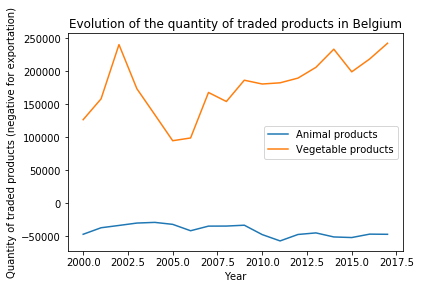

In [29]:
total_animal_product = []
total_vegetable_product = []
for year in range(2000, 2018):
    total_animal_product.append(belgium_animal_trade.xs(year, level=1)['Net Quantity'].sum())
    total_vegetable_product.append(belgium_vegetable_trade.xs(year, level=1)['Net Quantity'].sum())

plt.plot(range(2000,2018), total_animal_product, label='Animal products')
plt.plot(range(2000,2018), total_vegetable_product, label='Vegetable products')
plt.title("Evolution of the quantity of traded products in Belgium")
plt.ylabel("Quantity (tons) of traded products (negative for exportation)")
plt.xlabel("Year")
plt.legend()
plt.show()

We can see that Belgium export more animal product than it import and that the quantity of exported animal product is relatively constant while Belgium imports much more vegetable products (one part of these vegetable product are used to feed the livestock). Moreover the importation of vegetable product has grown in the past few years.

### Switzerland
We will do the same job for switzerland
We first neeed to extract data related to switzerlad in the detailed trade matrix

In [12]:
trades.registerTempTable("Trades")

query = """
SELECT *
FROM Trades
WHERE Countries = 'Switzerland'
"""

swiss_trade = spark.sql(query)

+---------------------+-----------+--------------------+-----------------+---------+--------------------+------------+---------------+---------+----+--------+--------+----+
|Reporter Country Code|  Countries|Partner Country Code|Partner Countries|Item Code|                Item|Element Code|        Element|Year Code|Year|    Unit|   Value|Flag|
+---------------------+-----------+--------------------+-----------------+---------+--------------------+------------+---------------+---------+----+--------+--------+----+
|                  211|Switzerland|                   2|      Afghanistan|      231|     Almonds shelled|        5610|Import Quantity|     2016|2016|  tonnes|0.000000|null|
|                  211|Switzerland|                   2|      Afghanistan|      231|     Almonds shelled|        5622|   Import Value|     2016|2016|1000 US$|0.000000|null|
|                  211|Switzerland|                   2|      Afghanistan|     1169|Animals, live, no...|        5622|   Import Value| 

In [13]:
swiss_trade_df = swiss_trade.toPandas()
swiss_trade_df.to_csv(GENERATED_DATA_PATH+'trade_switzerland.csv')

In [27]:
swiss_trade_df = pd.read_csv(GENERATED_DATA_PATH+'trade_switzerland.csv', index_col=0)
swiss_trade_df = swiss_trade_df.drop(columns=['Reporter Country Code', 'Countries', 'Partner Country Code', 'Item Code', 'Element Code', 'Year Code', 'Unit', 'Flag'])
swiss_trade_df = swiss_trade_df.rename(columns={'Partner Countries': 'Country'})

In [31]:
swiss_animal_trade = clean_trade_data(swiss_trade_df, animal_item)
swiss_vegetable_trade = clean_trade_data(swiss_trade_df, vegetable_item)

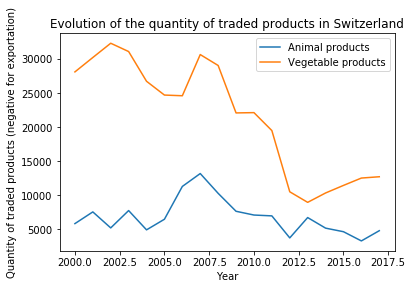

In [32]:
total_animal_product = []
total_vegetable_product = []
for year in range(2000, 2018):
    total_animal_product.append(swiss_animal_trade.xs(year, level=1)['Net Quantity'].sum())
    total_vegetable_product.append(swiss_vegetable_trade.xs(year, level=1)['Net Quantity'].sum())

plt.plot(range(2000,2018), total_animal_product, label='Animal products')
plt.plot(range(2000,2018), total_vegetable_product, label='Vegetable products')
plt.title("Evolution of the quantity of traded products in Switzerland")
plt.ylabel("Quantity (tons) of traded products (negative for exportation)")
plt.xlabel("Year")
plt.legend()
plt.show()

We can see that switzerland import both animal and vegetable products. The importation of meat product is constance while the importation of vegetable product has decrease from 2007.

### Comparison between belgium and switzerland
The first comparison is made based on the quantity of importation for animal and vegetable products.

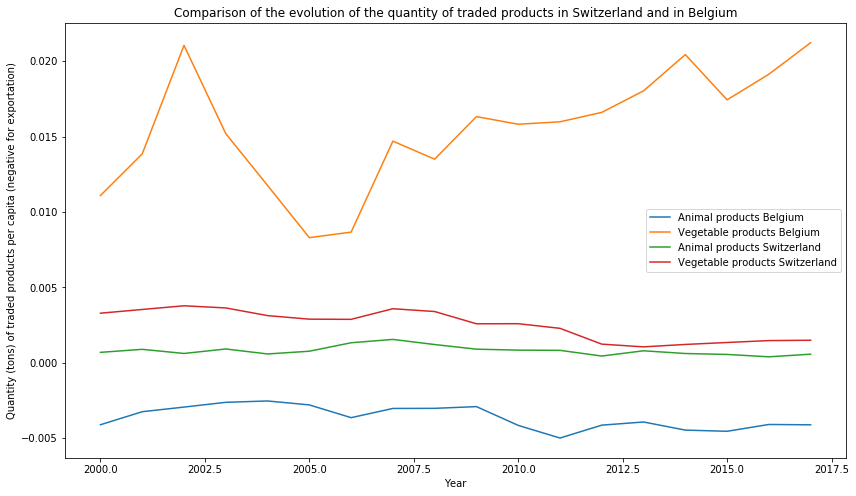

In [38]:
total_animal_product_belgium = []
total_vegetable_product_belgium = []
total_animal_product_switzerland = []
total_vegetable_product_switzerland = []

people_swiss = 8556000
people_belgium = 11400000

for year in range(2000, 2018):
    total_animal_product_belgium.append(belgium_animal_trade.xs(year, level=1)['Net Quantity'].sum()/people_belgium)
    total_vegetable_product_belgium.append(belgium_vegetable_trade.xs(year, level=1)['Net Quantity'].sum()/people_belgium)
    total_animal_product_switzerland.append(swiss_animal_trade.xs(year, level=1)['Net Quantity'].sum()/people_swiss)
    total_vegetable_product_switzerland.append(swiss_vegetable_trade.xs(year, level=1)['Net Quantity'].sum()/people_swiss)

plt.figure(figsize=(14,8))
plt.plot(range(2000,2018), total_animal_product_belgium, label='Animal products Belgium')
plt.plot(range(2000,2018), total_vegetable_product_belgium, label='Vegetable products Belgium')
plt.plot(range(2000,2018), total_animal_product_switzerland, label='Animal products Switzerland')
plt.plot(range(2000,2018), total_vegetable_product_switzerland, label='Vegetable products Switzerland')
plt.title("Comparison of the evolution of the quantity of traded products in Switzerland and in Belgium")
plt.ylabel("Quantity (tons) of traded products per capita (negative for exportation)")
plt.xlabel("Year")
plt.legend()
plt.show()

We can see that per capita, Belgium export more animal products but import much more vegetable product than Switzerland.

### Adding emissions
We will first compare direct emissions of the two countries. Then we will add the emission from the country where Belgium and Switzerland import their food. 

We will now join the emission dataframe with the dataframes created in the previous section

In [159]:
swiss_emission = emissions_total.loc['Switzerland']
swiss_emission = swiss_emission[swiss_emission.index >= 2000]
swiss_emission = swiss_emission[swiss_emission.index < 2018]

belgium_emission = emissions_total.loc['Belgium']
belgium_emission = belgium_emission[belgium_emission.index >= 2000]
belgium_emission = belgium_emission[belgium_emission.index < 2018]

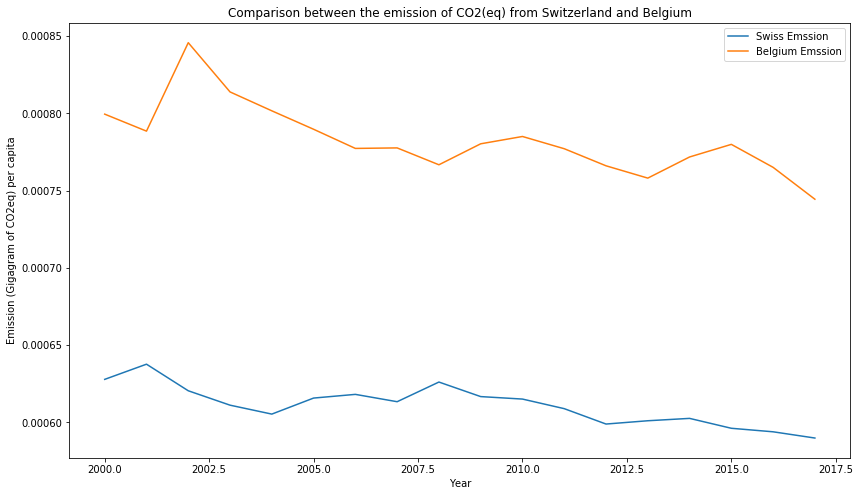

In [163]:
plt.figure(figsize=(14,8))
plt.plot(swiss_emission.index, swiss_emission.Sum/people_swiss, label='Swiss Emssion')
plt.plot(belgium_emission.index, belgium_emission.Sum/people_belgium, label='Belgium Emssion')
plt.title("Comparison between the emission of CO2(eq) per capita from Switzerland and Belgium")
plt.ylabel("Emission (Gigagram of CO2eq) per capita")
plt.xlabel("Year")
plt.legend()
plt.show()

We see that Belgium emits much more CO2eq per capita than Switerland. But it seems that both country try to reduce their emissions of CO2 eq.

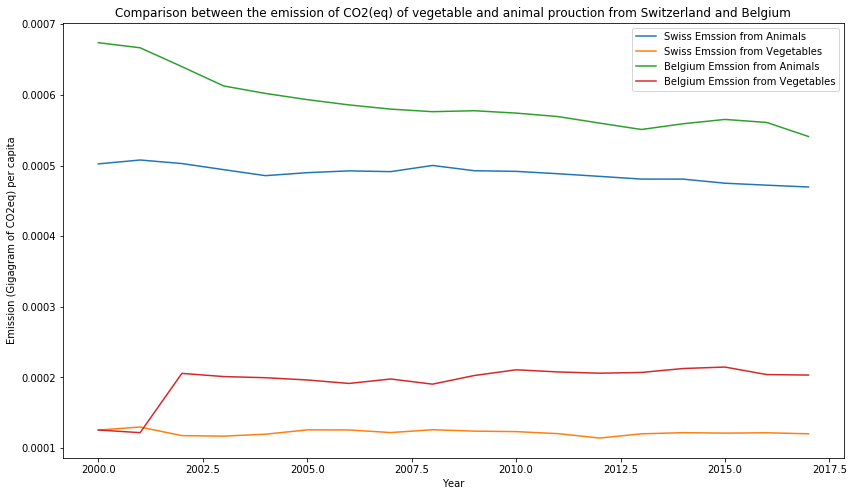

In [167]:
plt.figure(figsize=(14,8))
plt.plot(swiss_emission.index, swiss_emission.Animal/people_swiss, label='Swiss Emssion from Animals')
plt.plot(swiss_emission.index, swiss_emission.Vegetal/people_swiss, label='Swiss Emssion from Vegetables')
plt.plot(belgium_emission.index, belgium_emission.Animal/people_belgium, label='Belgium Emssion from Animals')
plt.plot(belgium_emission.index, belgium_emission.Vegetal/people_belgium, label='Belgium Emssion from Vegetables')
plt.title("Comparison between the emission of CO2(eq) of vegetable and animal prouction per capita from Switzerland and Belgium")
plt.ylabel("Emission (Gigagram of CO2eq) per capita")
plt.xlabel("Year")
plt.legend()
plt.show()

As seen before the majority of the emission is due to the production of animal product. Moreover the decreasing of the emission in total is due more by the reduction of emission of CO2eq from the production of animal products.

We now add the emission in the previously constructed datasets

In [178]:
def add_emissions(trade, emissions_total, local_emission):
    trade = pd.merge(trade, emissions_total['Animal'], left_index=True, right_index=True)
    trade = trade.rename(columns={'Animal':'Emission'})
    trade = pd.merge(trade, local_emission['Animal'], left_index=True, right_index=True)
    trade = trade.rename(columns={'Animal':'Local Emission'})
    return trade


belgium_animal_trade = add_emissions(belgium_animal_trade, emissions_total, belgium_emission)
belgium_vegetable_trade = add_emissions(belgium_vegetable_trade, emissions_total, belgium_emission)
swiss_animal_trade = add_emissions(swiss_animal_trade, emissions_total, swiss_emission)
swiss_vegetable_trade = add_emissions(swiss_vegetable_trade, emissions_total, swiss_emission)

In [180]:
belgium_animal_trade.to_csv(GENERATED_DATA_PATH+'belgium_animal_trade.csv')
belgium_vegetable_trade.to_csv(GENERATED_DATA_PATH+'belgium_vegetable_trade.csv')
swiss_animal_trade.to_csv(GENERATED_DATA_PATH+'swiss_animal_trade.csv')
swiss_vegetable_trade.to_csv(GENERATED_DATA_PATH+'swiss_vegetable_trade.csv')